In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import re

In [2]:
df = pd.read_csv(r'C:\Users\nguyen\OneDrive\Tài liệu\baitaplonn\Time_Series_with_Python\notebook\data\raw\sample_submission.csv')
df.head(10)

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
0,HOBBIES_1_001_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,HOBBIES_1_002_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,HOBBIES_1_003_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,HOBBIES_1_004_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,HOBBIES_1_005_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,HOBBIES_1_006_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,HOBBIES_1_007_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,HOBBIES_1_008_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,HOBBIES_1_009_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,HOBBIES_1_010_CA_1_validation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60980 entries, 0 to 60979
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      60980 non-null  object
 1   F1      60980 non-null  int64 
 2   F2      60980 non-null  int64 
 3   F3      60980 non-null  int64 
 4   F4      60980 non-null  int64 
 5   F5      60980 non-null  int64 
 6   F6      60980 non-null  int64 
 7   F7      60980 non-null  int64 
 8   F8      60980 non-null  int64 
 9   F9      60980 non-null  int64 
 10  F10     60980 non-null  int64 
 11  F11     60980 non-null  int64 
 12  F12     60980 non-null  int64 
 13  F13     60980 non-null  int64 
 14  F14     60980 non-null  int64 
 15  F15     60980 non-null  int64 
 16  F16     60980 non-null  int64 
 17  F17     60980 non-null  int64 
 18  F18     60980 non-null  int64 
 19  F19     60980 non-null  int64 
 20  F20     60980 non-null  int64 
 21  F21     60980 non-null  int64 
 22  F22     60980 non-null

=> các cột đã được đưa về dạng chuẩn 

Dữ liệu này là mẫu dự đoán sản lượng bán hàng 28 ngày cho các sản phẩm trong hệ thống bán lẻ (M5 Forecasting). Nó không chứa dữ liệu thực tế, mà chỉ là “mẫu nộp” cho mô hình dự đoán.
```
id mô tả mã sản phẩm (ví dụ: HOBBIES_1_001_CA_1_validation = mặt hàng nhóm “HOBBIES_1”, bán tại “CA_1”).
F1 → F28 là dự báo số lượng sản phẩm bán ra trong 28 ngày tiếp theo.
```

## 1. kiểm tra tên cột 


In [4]:


pattern = re.compile(r'^[A-Za-z0-9_]+$') 

invalid_cols = [col for col in df.columns if not pattern.match(col)]

duplicates = df.columns[df.columns.duplicated()]

cols_with_spaces = [col for col in df.columns if col != col.strip()]

valid_cols = ["id"] + [f"F{i}" for i in range(1, 29)]

invalid_cols = [col for col in df.columns if col not in valid_cols]

if invalid_cols:
    print("⚠️ Các cột không đúng mẫu:", invalid_cols)
else:
    print("✅ Tất cả tên cột hợp lệ.")

if cols_with_spaces:
    print("⚠️ Các cột có khoảng trắng:", cols_with_spaces)
else:
    print("✅ Không có cột nào chứa khoảng trắng thừa.")

if len(duplicates) > 0:
    print("⚠️ Các cột bị trùng tên:", duplicates.tolist())
else:
    print("✅ Không có cột trùng tên.")

if invalid_cols:
    print("⚠️ Các cột có tên sai định dạng:", invalid_cols)
else:
    print("✅ Tất cả tên cột đều đúng định dạng.")


✅ Tất cả tên cột hợp lệ.
✅ Không có cột nào chứa khoảng trắng thừa.
✅ Không có cột trùng tên.
✅ Tất cả tên cột đều đúng định dạng.


## 2. kiểm tra dữ liệu thiếu


In [5]:
print("Tổng số giá trị bị thiếu:", df.isna().sum().sum())
print("Các dòng có giá trị thiếu:")
print(df[df.isna().any(axis=1)])



Tổng số giá trị bị thiếu: 0
Các dòng có giá trị thiếu:
Empty DataFrame
Columns: [id, F1, F2, F3, F4, F5, F6, F7, F8, F9, F10, F11, F12, F13, F14, F15, F16, F17, F18, F19, F20, F21, F22, F23, F24, F25, F26, F27, F28]
Index: []

[0 rows x 29 columns]


## 3. kiểm tra giá trị trùng lặp

In [6]:
print("Tổng số giá trị bị thiếu:", df.duplicated().sum())
print("Các dòng bị trùng lặp:")
print(df[df.duplicated()])


Tổng số giá trị bị thiếu: 0
Các dòng bị trùng lặp:
Empty DataFrame
Columns: [id, F1, F2, F3, F4, F5, F6, F7, F8, F9, F10, F11, F12, F13, F14, F15, F16, F17, F18, F19, F20, F21, F22, F23, F24, F25, F26, F27, F28]
Index: []

[0 rows x 29 columns]


## 4. kiểm tra ngoại lệ


In [11]:

# Lấy các cột kiểu số
numeric_cols = df.select_dtypes(include=[np.number]).columns

# Tính tổng số ngoại lệ
total_outliers = 0

for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower) | (df[col] > upper)]
    total_outliers += len(outliers)

print(f"Tổng số giá trị ngoại lệ (IQR): {total_outliers}")


Tổng số giá trị ngoại lệ (IQR): 0


## 5. Kiểm tra giá trị bất thường 

In [14]:
df.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,...,F19,F20,F21,F22,F23,F24,F25,F26,F27,F28
count,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0,...,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0,60980.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


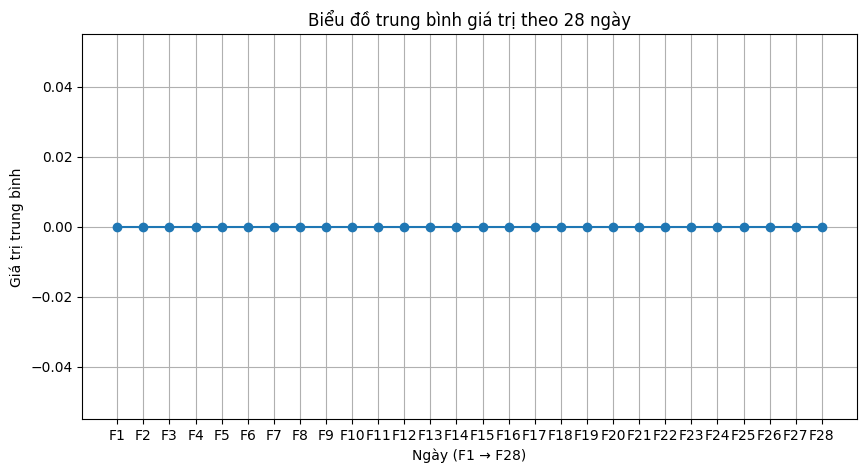

In [15]:

# Lấy cột 28 ngày
day_cols = [f"F{i}" for i in range(1, 29)]

# Tính trung bình mỗi ngày
mean_by_day = df[day_cols].mean()

# Vẽ biểu đồ đường
plt.figure(figsize=(10,5))
plt.plot(day_cols, mean_by_day, marker='o')
plt.title("Biểu đồ trung bình giá trị theo 28 ngày")
plt.xlabel("Ngày (F1 → F28)")
plt.ylabel("Giá trị trung bình")
plt.grid(True)
plt.show()


### => Tệp sample_submission.csv không phải là dữ liệu thật, mà chỉ là mẫu định dạng nộp bài (template). 